# Program 2: Divide and Conquer

Alex, Matthew, Jack

CSC 3310 001

## Approach

The idea is:

1. Choose a pivot element.
2. Partition the array into:
   - Elements smaller than the pivot
   - Elements equal to the pivot
   - Elements larger than the pivot
3. Determine which partition contains the kth smallest element.
4. Recursively continue only in that partition.

Unlike sorting (which processes the entire array), we will only recurse into one side, making it faster.

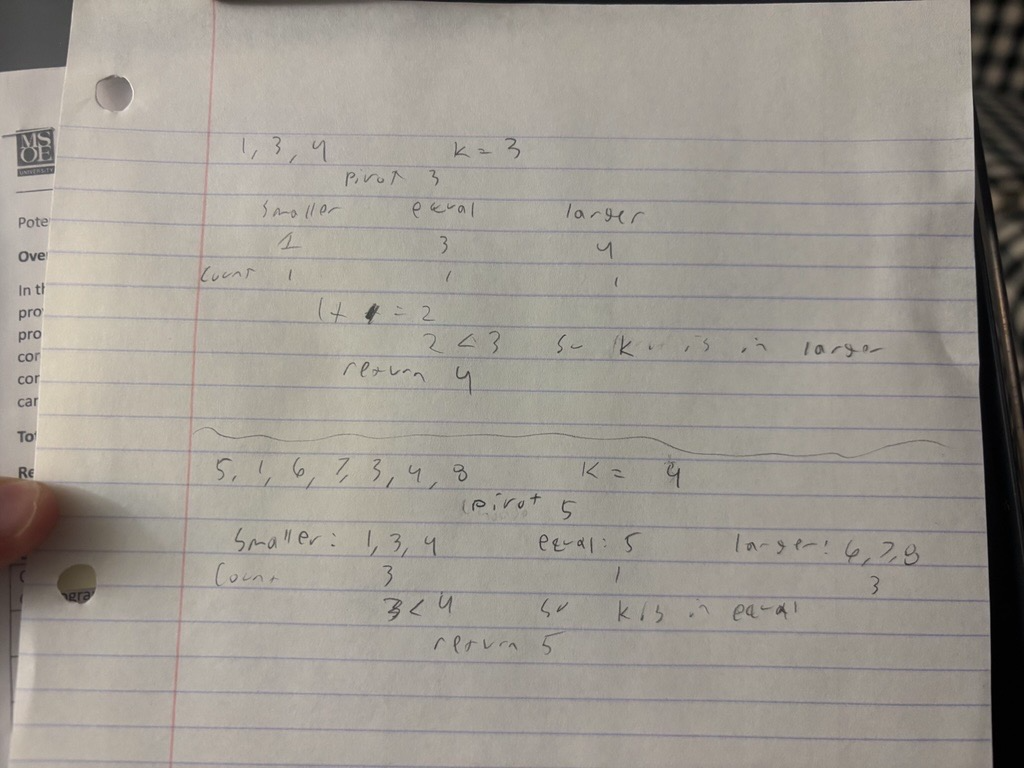

## Pseudocode

```txt
QUICKSELECT(A, k):

    if length(A) == 1:
        return A[0]

    pivot = random element from A

    L = elements less than pivot
    E = elements equal to pivot
    G = elements greater than pivot

    if k <= length(L):
        return QUICKSELECT(L, k)

    else if k <= length(L) + length(E):
        return pivot

    else:
        return QUICKSELECT(G, k - length(L) - length(E))
```

## Justification of Correctness

The algorithm is correct because:

1. Partitioning preserves order relations.
   - All elements in L are smaller than pivot.
   - All elements in G are larger than pivot.

2. The kth smallest element must lie in exactly one of these partitions.

3. Each recursive call reduces the problem size.

4. Base case (size = 1) returns the only element.

Thus, by induction:
If the algorithm correctly solves smaller instances,
it correctly solves larger instances.

Therefore, QuickSelect correctly finds the kth smallest element.

## Implementation

In [ ]:
# Code implementation of our algorithm here
import random

def quick_select(arr, k):
    if len(arr) == 1:
        return arr[0]
    
    pivot = random.choice(arr)
    
    L = [x for x in arr if x < pivot]
    E = [x for x in arr if x == pivot]
    G = [x for x in arr if x > pivot]
    
    if k <= len(L):
        return quick_select(L, k)
    elif k <= len(L) + len(E):
        return pivot
    else:
        return quick_select(G, k - len(L) - len(E))

In [2]:
# Code implementation of an algorithm that sorts the numbers 
# and picks index k-1
def sort_select(nums, k):
    nums.sort()
    return nums[k-1]

## Test Cases
| Input | Expected Output | Output |
|-------|----------------|--------|
| [5,1,6,7,3,4,8], 3 | 4 | 4 |
| [10,9,8,7,6,5,4], 1 | 4 | 4 |
| [2,2,2,2,2], 4 | 2 | 2 |
| [100, 50, 25, 75, 10], 2 | 25 | 25 |
| [1,2], 2 | 2 | 2 |
| [1], 1 | 1 | 1 |


In [ ]:
# Run implementation with test cases here
test_cases = [
    ([5,1,6,7,3,4,8], 3),
    ([10,9,8,7,6,5,4], 1),
    ([2,2,2,2,2], 4),
    ([100, 50, 25, 75, 10], 2),
    ([1,2], 2)
]
for arr, k in test_cases:
  print(f"Input: {arr}, k={k}")
  print(f"Quickselect: {quick_select(arr.copy(), k)}")
  print(f"Sort method: {sort_select(arr.copy(), k)}")

Input: [5, 1, 6, 7, 3, 4, 8], k=3
Quickselect: 4
Sort method: 4
Input: [10, 9, 8, 7, 6, 5, 4], k=1
Quickselect: 4
Sort method: 4
Input: [2, 2, 2, 2, 2], k=4
Quickselect: 2
Sort method: 2
Input: [100, 50, 25, 75, 10], k=2
Quickselect: 25
Sort method: 25
Input: [1, 2], k=2
Quickselect: 2
Sort method: 2


## Derivation of Recurrence Relation

Partition is O(n)

Recursive call on half the array = T(n/2)

This is assuming that using a random pivot will amortize to about half the array each time.

T(n) = T(n/2) + n

## Solution of Recurrence Relation

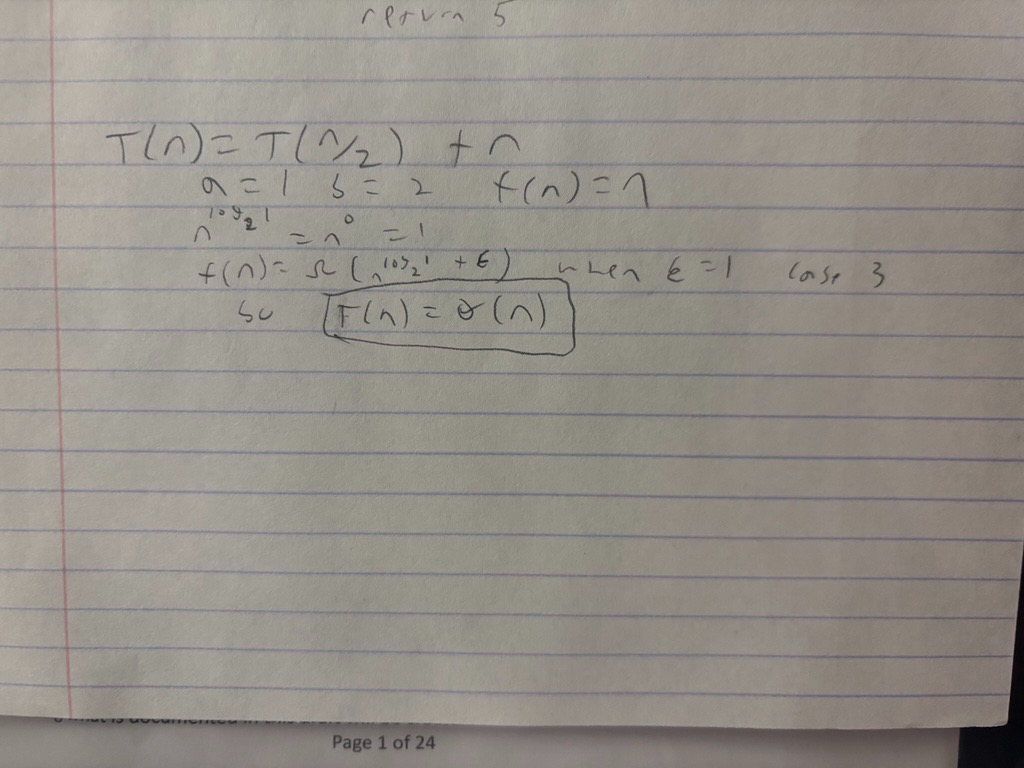


## Benchmarking

In [ ]:
# Benchmarking
import time
import matplotlib.pyplot as plt

sizes = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
qs_times = []
sort_times = []
ks = []

for n in sizes:
    print(n)
    arr = [random.randint(1, 1000000) for _ in range(n)]
    arr2 = arr.copy()
    k = random.randint(1, n)
    ks.append(k)
    
    start_sort = time.time()
    sort_select(arr, k)
    stop_sort = time.time()
    sort_times.append(stop_sort - start_sort)

    start_quick = time.time()
    quick_select(arr2, k)
    stop_quick = time.time()
    qs_times.append(stop_quick - start_quick)

print("Size | k | QuickSelect Time | Sort Select Time")
for i in range(len(sizes)):
    print(sizes[i], "|", ks[i], "|", qs_times[i], "|", sort_times[i])

1
10
100
1000
10000
100000
1000000
10000000
100000000
Size | k | QuickSelect Time | Sort Select Time
1 | 1 | 1.1920928955078125e-06 | 1.1920928955078125e-06
10 | 4 | 5.4836273193359375e-06 | 9.5367431640625e-07
100 | 25 | 2.288818359375e-05 | 8.106231689453125e-06
1000 | 499 | 0.00023674964904785156 | 9.965896606445312e-05
10000 | 2031 | 0.001750946044921875 | 0.0011692047119140625
100000 | 20416 | 0.024982690811157227 | 0.020049571990966797
1000000 | 633053 | 0.22237062454223633 | 0.27103638648986816
10000000 | 4460441 | 4.745671272277832 | 4.120560884475708
100000000 | 81053206 | 37.02299356460571 | 59.643067359924316


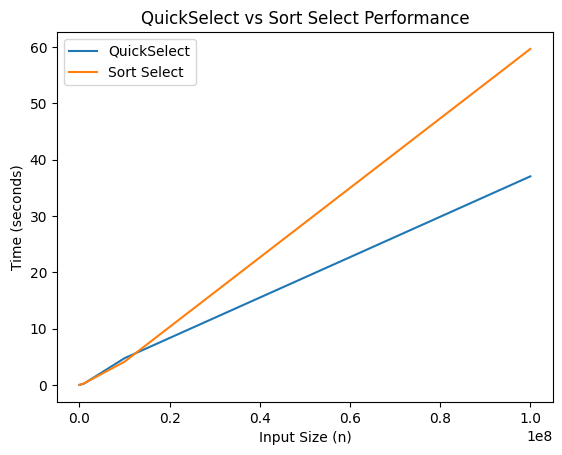

In [5]:
# Benchmarking graph
plt.figure()
plt.plot(sizes, qs_times)
plt.plot(sizes, sort_times)
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("QuickSelect vs Sort Select Performance")
plt.legend(["QuickSelect", "Sort Select"])
plt.show()